# Loan Data Analysis


In [1]:
%config IPCompleter.greedy=True

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Reading the data
Loan_Src = pd.read_csv("C:/Users/soumi/Documents/Upgrad/EDA group study/loan.csv")
Loan_Src.shape

C:\Users\soumi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

## Data Cleansing
### 1. Remove columns having no data

In [4]:
# Null Information on datasets
IssCols=Loan_Src.isnull().sum(axis=0)

#Identifying Columns which contain no data
IssCols = IssCols.where(IssCols==39717)
IssCols = IssCols[~np.isnan(IssCols)]
IssCol = list(IssCols.index)

#Drop redundant columns
Loan_Src2=Loan_Src.drop(IssCol,axis=1)

print(Loan_Src2.shape)

(39717, 57)


In [5]:
#null value check
Loan_Src2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [6]:
Unique=Loan_Src2.T.apply(lambda x: x.nunique(),axis=1)
Unique=Unique.where(Unique==1)
Unique=Unique[~np.isnan(Unique)]
print(Unique)

pymnt_plan                    1.0
initial_list_status           1.0
collections_12_mths_ex_med    1.0
policy_code                   1.0
application_type              1.0
acc_now_delinq                1.0
chargeoff_within_12_mths      1.0
delinq_amnt                   1.0
tax_liens                     1.0
dtype: float64


### for these columns we will not perform univariate analysis

## Derived Metrices

In [7]:
Loan_Src2['cr_line_Yr']=Loan_Src2['earliest_cr_line'].apply(lambda x:x.split("/")[2])
print(Loan_Src2['cr_line_Yr'].head(10))

0    1985
1    1999
2    2018
3    1996
4    1996
5    2018
6    2018
7    2018
8    2018
9    2018
Name: cr_line_Yr, dtype: object


In [8]:
#Adding a variable loan to Annual Income ratio
Loan_Src2['LoantoIncomeRatio']=round(Loan_Src2['loan_amnt']/Loan_Src2['annual_inc'],1)


In [9]:
#Add a variable - Recovered principal amount/loan amount ratio
Loan_Src2['RcvdtoLoanRatio']=round(Loan_Src2['total_rec_prncp']/Loan_Src2['loan_amnt'],1)
Loan_Src2.to_csv('Loan_Data_updated.csv')

In [29]:
#Removing % sign from revol_util column
Loan_Src2['revol_util'] = Loan_Src2['revol_util'].str.rstrip('%').astype('float') 
def RevolBalSection(y):
    try:
        if y<=10:
            time="10"
        elif y<=20:
            time="20"
        elif y<=30:
            time="30"
        elif y<=40:
            time="40"
        elif y<=50:
            time="50"
        elif y<=60:
            time="60"
        elif y<=70:
            time="70"
        elif y<=80:
            time="80"
        elif y<=90:
            time="90"
        else:
            time="90+"
        return time
    except:
        return "NA"
# Calculate Revol Balance bucket
Loan_Src2['RevolBalBckt']=Loan_Src2['revol_util'].apply(RevolBalSection)
#print(Loan_Src2['RevolBalBckt'])

In [10]:
# DTI bins calculation
def DTISection(y):
    try:
        if y<=5:
            time="0-5"
        elif y<=10:
            time="5-10"
        elif y<=15:
            time="11-15"
        elif y<=20:
            time="16-20"
        elif y<=25:
            time="21-25"
        elif y<=30:
            time="26-30"
        else:
            time="unknown"
        return time
    except:
        return "NA"
# Calculate DTI bucket
Loan_Src2['DTIClass']=Loan_Src2['dti'].apply(DTISection)
print(Loan_Src2.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade   ...    application_type  \
0   10.65%       162.87     B        B2   ...          INDIVIDUAL   
1   15.27%        59.83     C        C4   ...          INDIVIDUAL   
2   15.96%        84.33     C        C5   ...          INDIVIDUAL   
3   13.49%       339.31     C        C1   ...          INDIVIDUAL   
4   12.69%        67.79     B        B5   ...          INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths  delinq_amnt pub_rec_bankruptcies  \
0              0                     

In [11]:
# Calculate the Bins for total number of Line of Credits
def LOCSection(y):
    try:
        if y<=10:
            time="10"
        elif y<=20:
            time="20"
        elif y<=30:
            time="30"
        elif y<=40:
            time="40"
        elif y<=50:
            time="50"
        elif y<=60:
            time="60"
        else:
            time="60+"
        return time
    except:
        return "NA"
# Calculate DTI bucket
Loan_Src2['total_acc_buckt']=Loan_Src2['total_acc'].apply(LOCSection)

In [16]:
Loan_Src2['InstallmenttoIncomeRatio']=round((Loan_Src2['installment']*12)/Loan_Src2['annual_inc'],2)
print(Loan_Src2['InstallmenttoIncomeRatio'])

0        0.08
1        0.02
2        0.08
3        0.08
4        0.01
5        0.05
6        0.04
7        0.03
8        0.05
9        0.10
10       0.03
11       0.06
12       0.12
13       0.08
14       0.04
15       0.02
16       0.10
17       0.01
18       0.03
19       0.04
20       0.13
21       0.08
22       0.08
23       0.08
24       0.03
25       0.06
26       0.10
27       0.03
28       0.01
29       0.13
         ... 
39687    0.06
39688    0.06
39689    0.02
39690    0.08
39691    0.02
39692    0.01
39693    0.10
39694    0.01
39695    0.02
39696    0.20
39697    0.14
39698    0.03
39699    0.06
39700    0.25
39701    0.03
39702    0.07
39703    0.01
39704    0.05
39705    0.02
39706    0.01
39707    0.01
39708    0.04
39709    0.02
39710    0.02
39711    0.03
39712    0.01
39713    0.18
39714    0.02
39715    0.01
39716    0.14
Name: InstallmenttoIncomeRatio, Length: 39717, dtype: float64


## Analysis - Univariate

## #Analysis 1 - Tenure wise analysis - Defaulter rate 

loan_status  Charged Off  Current  Fully Paid  Ratio
term                                                
 36 months        3227.0      NaN     25869.0   0.12
 60 months        2400.0   1140.0      7081.0   0.34


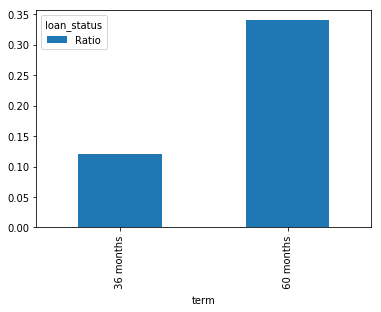

0.23


In [52]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='term',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio'] = round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)
Loan_Src2_Analysis.plot(y=["Ratio"],kind="bar")
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### Finding 1: 60 months tenure is more risky

## #Analysis 2 - Defaulter analysis - Loan Amount to Yearly income

loan_status        Charged Off  Current  Fully Paid  Ratio
LoantoIncomeRatio                                         
0.0                        312       25        2587   0.12
0.1                       1672      236       12834   0.13
0.2                       1645      343       10071   0.16
0.3                       1074      265        4592   0.23
0.4                        566      160        2028   0.28
0.5                        281       95         678   0.41
0.6                         64       14         125   0.51
0.7                         10        1          28   0.36
0.8                          3        1           7   0.43


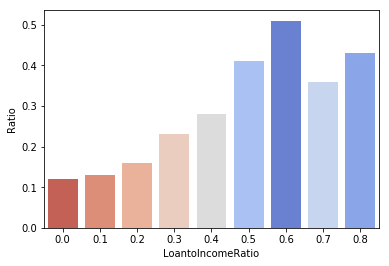

0.29222222222222227


In [53]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='LoantoIncomeRatio',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
#Loan_Src2_Analysis.plot(y=["Ratio"],kind="bar")
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### Finding 2: loan amount upto 30% of annual income has comparatively low risk of default; loan amount 30 - 40 % has moderate range of risk; above 40 % has high risk


## Analysis 3: Default Analysis - Grade based study

loan_status  Charged Off  Current  Fully Paid  Ratio
grade                                               
A                    602       40        9443   0.06
B                   1425      345       10250   0.14
C                   1347      264        6487   0.21
D                   1118      222        3967   0.28
E                    715      179        1948   0.37
F                    319       73         657   0.49
G                    101       17         198   0.51


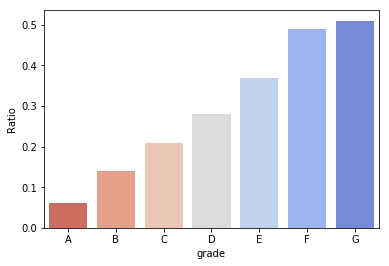

0.2942857142857143


In [54]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='grade',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
#Loan_Src2_Analysis.plot(y=["Ratio"],kind="bar")
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### Entity having Loan grade A-C are low risk, D- moderate risk, E-G - high risk

## Analysis 4: State wise Default ratio

In [55]:
import squarify
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='addr_state',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Data=Loan_Src2_Analysis
Data.fillna(0.00001,inplace=True)
Data['state']=Data.index
Data['total']=round(Data['Charged Off']+Data['Current']+Data['Fully Paid'],0)
Data.sort_values(by='Ratio',ascending=False,inplace=True)
#select data with significant sample size
Data=Data[Data['total'] > 30]
Data.to_csv('Statewise.csv')
print(Loan_Src2_Analysis['Ratio'].mean())

0.18140060000000008


#### the eastern states are generally showing risk indicators as high; the SE states are also generally showing high risk indicators
#### please see the map for more details

## Analysis 6 - Defaulter ratio employment length wise

loan_status  Charged Off  Current  Fully Paid  Ratio
emp_length                                          
1 year               456       71        2713   0.17
10+ years           1331      391        7157   0.19
2 years              567       97        3724   0.15
3 years              555       83        3457   0.16
4 years              462       94        2880   0.16
5 years              458       88        2736   0.17
6 years              307       61        1861   0.16
7 years              263       62        1448   0.18
8 years              203       44        1232   0.16
9 years              158       32        1068   0.15
< 1 year             639       75        3869   0.17


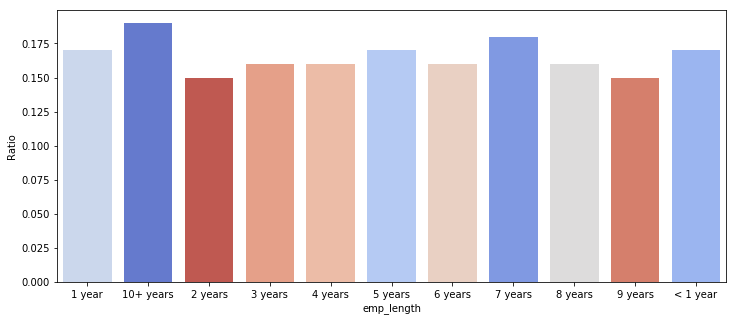

0.1654545454545454


In [56]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='emp_length',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
# figure size
plt.figure(figsize=(12,5))

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### No significant trend available

## Analysis 7 - Defaulter ratio purpose wise

loan_status         Charged Off  Current  Fully Paid  Ratio
purpose                                                    
car                       160.0     50.0      1339.0   0.12
credit_card               542.0    103.0      4485.0   0.12
debt_consolidation       2767.0    586.0     15288.0   0.18
educational                56.0      NaN       269.0   0.21
home_improvement          347.0    101.0      2528.0   0.14
house                      59.0     14.0       308.0   0.19
major_purchase            222.0     37.0      1928.0   0.12
medical                   106.0     12.0       575.0   0.18
moving                     92.0      7.0       484.0   0.19
other                     633.0    128.0      3232.0   0.20
renewable_energy           19.0      1.0        83.0   0.23
small_business            475.0     74.0      1279.0   0.37
vacation                   53.0      6.0       322.0   0.16
wedding                    96.0     21.0       830.0   0.12


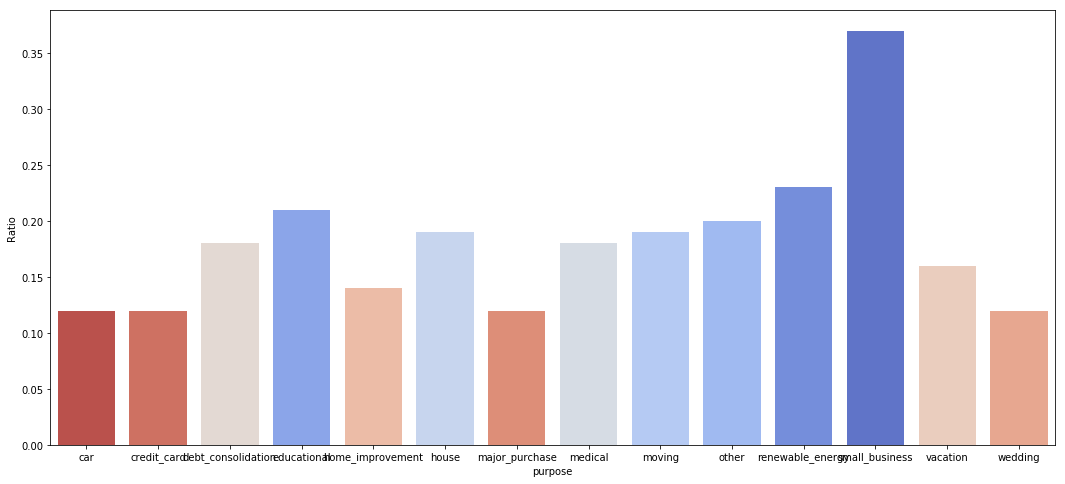

0.18071428571428574


In [57]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='purpose',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
# figure size
plt.figure(figsize=(18,8))

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### car/credit_card/major_purchase/wedding/improvement/vacation - low risk ; 
##### small business/renewable energy/other/education/ - high risk; 
##### consolidation/moving/house/medical - moderate risk

## Analysis 8 - Defaulter ratio DTI based analysis

loan_status  Charged Off  Current  Fully Paid  Ratio
DTIClass                                            
0-5                  626       98        4436   0.14
11-15               1402      269        8228   0.17
16-20               1389      284        7422   0.19
21-25               1118      237        5460   0.20
26-30                 87       53         536   0.16
5-10                1005      199        6868   0.15


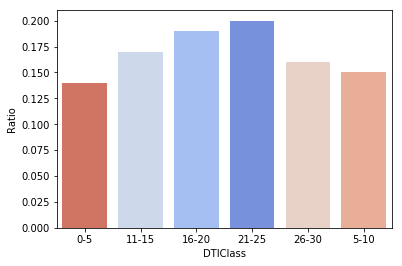

0.16833333333333333


In [58]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='DTIClass',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
print(Loan_Src2_Analysis)


data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### dti value : 16- 25 has high risk; 11-15 & 26-30 has moderate risk and 0-10 has low risk 

## Analysis 9 - Earliest Credit Line analysis

loan_status  Charged Off  Current  Fully Paid  Ratio    total
cr_line_Yr                                                   
1970                 7.0      1.0        40.0   0.18     48.0
1971                 5.0      1.0        40.0   0.12     46.0
1972                 8.0      4.0        41.0   0.20     53.0
1973                12.0      5.0        49.0   0.24     66.0
1974                 6.0      3.0        56.0   0.11     65.0
1976                 4.0      4.0        89.0   0.04     97.0
1977                13.0      3.0        99.0   0.13    115.0
1978                23.0      4.0       138.0   0.17    165.0
1979                31.0      8.0       126.0   0.25    165.0
1980                16.0      5.0       159.0   0.10    180.0
1981                20.0      6.0       161.0   0.12    187.0
1982                32.0      9.0       183.0   0.17    224.0
1983                53.0     16.0       269.0   0.20    338.0
1984                49.0     14.0       346.0   0.14    409.0
1985    

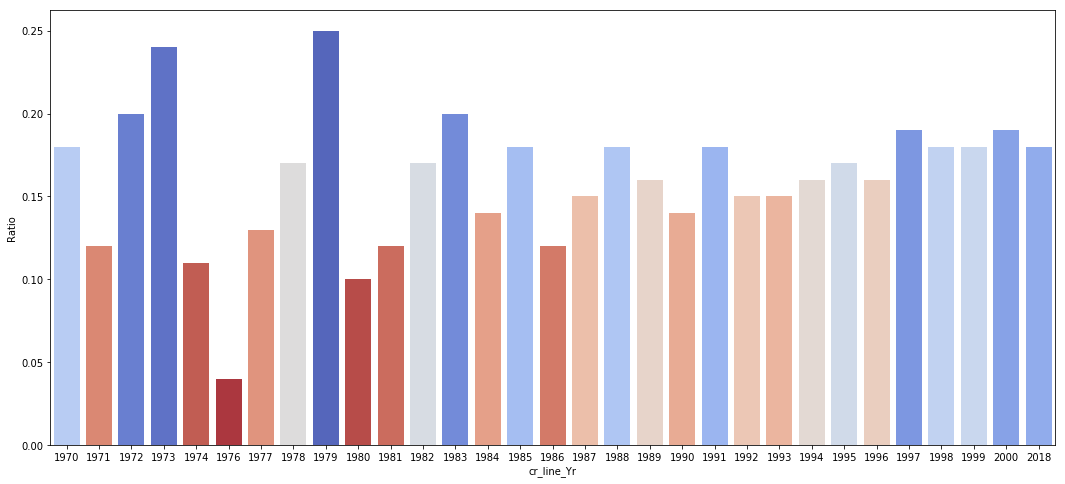

In [35]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='cr_line_Yr',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)
Loan_Src2_Analysis.fillna(0,inplace=True)
#considering years with atleast 30 sample size for normal distribution behaviour of sample
Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['total']>30]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
# figure size
plt.figure(figsize=(18,8))

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()

#### No significant trend available

## Analysis 10 - Home Ownership analysis

loan_status     Charged Off  Current  Fully Paid  Ratio    total
home_ownership                                                  
MORTGAGE             2327.0    638.0     14694.0   0.16  17659.0
NONE                    0.0      0.0         3.0   0.00      0.0
OTHER                  18.0      0.0        80.0   0.22      0.0
OWN                   443.0     83.0      2532.0   0.17   3058.0
RENT                 2839.0    419.0     15641.0   0.18  18899.0


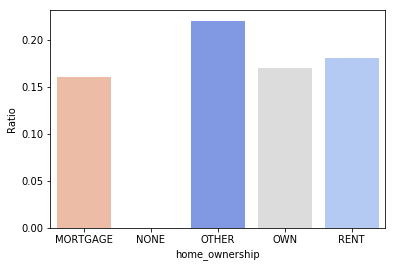

0.146


In [59]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='home_ownership',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)
Loan_Src2_Analysis.fillna(0,inplace=True)
#Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['total']>30]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### Moderate risk - in Mortgage/OWN/RENT. OTHERS - High Risk

## Analysis 11 - Public Record Analysis

loan_status  Charged Off  Current  Fully Paid  Ratio    total
pub_rec                                                      
0                 5160.0   1094.0     31347.0   0.16  37601.0
1                  457.0     43.0      1556.0   0.29   2056.0
2                   10.0      3.0        38.0   0.26     51.0


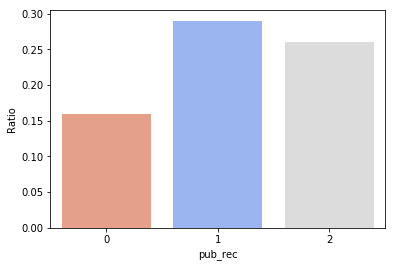

0.23666666666666666


In [60]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='pub_rec',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis.fillna(0,inplace=True)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)
Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['total']>30]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### No significant trend available - sample size vary to a great extent to determine any trend

## Analysis 12 - Total Credit Line Analysis

loan_status      Charged Off  Current  Fully Paid  Ratio  total
total_acc_buckt                                                
10                       977      103        4868   0.20   5948
20                      2016      388       11610   0.17  14014
30                      1485      381        9437   0.16  11303
40                       774      196        4695   0.16   5665
50                       282       52        1659   0.17   1993
60                        67       16         501   0.13    584
60+                       26        4         180   0.14    210


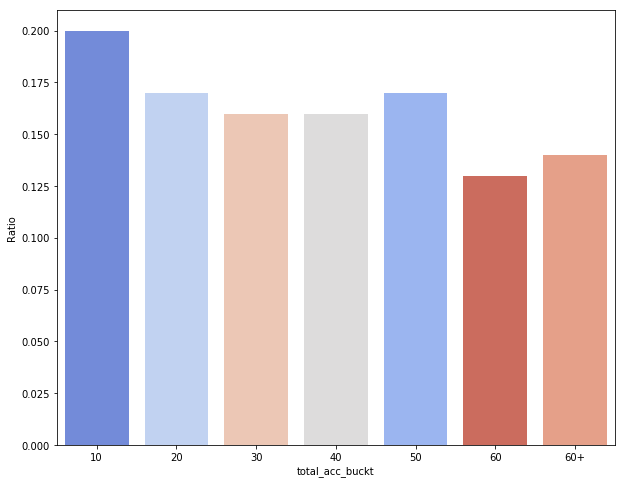

0.16142857142857145


In [61]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='total_acc_buckt',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis.fillna(0,inplace=True)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)

#Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['Ratio']>0.17]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
# figure size
plt.figure(figsize=(10,8))
#sns.boxplot(Loan_Src2_Analysis["Ratio"])
#plt.show()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### upto 10 credit line accounts - high risk >10 and <50 - moderate risk > 50 - low risk

## Analysis 14 - Verification Analysis

loan_status          Charged Off  Current  Fully Paid  Ratio  total
verification_status                                                
Not Verified                2142      227       14552   0.15  16921
Source Verified             1434      310        8243   0.17   9987
Verified                    2051      603       10155   0.20  12809


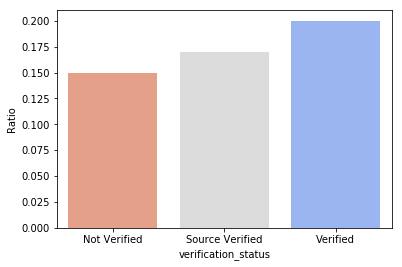

0.17333333333333334


In [62]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='verification_status',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis.fillna(0,inplace=True)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)

#Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['total']>30]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### Source verification is not helping to identify risk correctly. This is an unexpected insight

## Analysis 15 - Defaulter analysis - Installment Amount to Yearly income

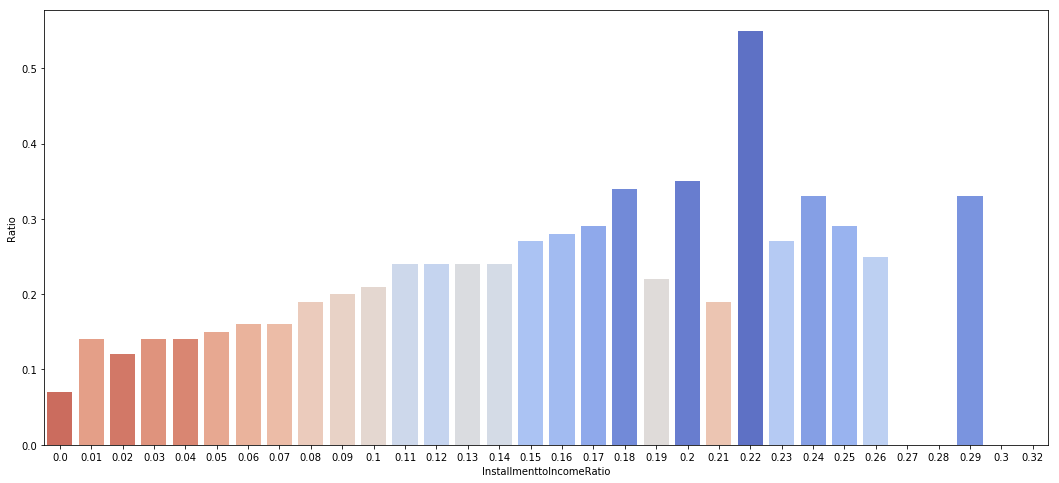

In [66]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='InstallmenttoIncomeRatio',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis.fillna(0,inplace=True)
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
#print(Loan_Src2_Analysis)
# figure size
plt.figure(figsize=(18,8))
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
#Loan_Src2_Analysis.plot(y=["Ratio"],kind="bar")
plt.show()

#### Finding : installment amount upto 10% of annual income has comparatively low risk of default; 10 - 15 % has moderate range of risk; above 15 % has high risk of default


## Analysis 16: Defaulter Analysis - Delinquincy in last 2 years based study

loan_status  Charged Off  Current  Fully Paid  Ratio    total
delinq_2yrs                                                  
0                 4936.0   1019.0     29450.0   0.17  35405.0
1                  507.0     96.0      2700.0   0.19   3303.0
2                  130.0     14.0       543.0   0.24    687.0
3                   35.0      8.0       177.0   0.20    220.0
4                   13.0      2.0        47.0   0.28     62.0


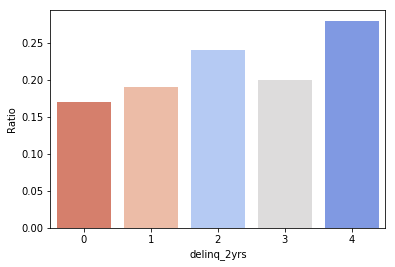

0.21600000000000003


In [67]:
Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='delinq_2yrs',columns='loan_status',aggfunc='count')
Loan_Src2_Analysis.fillna(0,inplace=True)
Loan_Src2_Analysis['Ratio']=round(Loan_Src2_Analysis['Charged Off']/Loan_Src2_Analysis['Fully Paid'],2)
Loan_Src2_Analysis['total']=round(Loan_Src2_Analysis['Charged Off']+Loan_Src2_Analysis['Current']+Loan_Src2_Analysis['Fully Paid'],0)
Loan_Src2_Analysis=Loan_Src2_Analysis.loc[Loan_Src2_Analysis['total']>30]
print(Loan_Src2_Analysis)
data = Loan_Src2_Analysis["Ratio"]
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
#Loan_Src2_Analysis.plot(y=["Ratio"],kind="bar")
plt.show()
print(Loan_Src2_Analysis['Ratio'].mean())

#### delinquincy of less than 2 times is comparatively less risky but >=2 times has higher defaulter rate